Psuedocode:

    env = ... # given: some environment object
    Q = random
    for i in range(num_episodes):
        s = env.reset()
        done = False
        while not done:
            a = choose_action(Q,s)
            s`, r, done = env.step(a)

            # Update Q
            y = r + gamma * max_a`{ Q(s`,a`) }
            Q(s,a) = Q(s,a) + learning_rate * (y - Q(s,a))

            # important: update the current state
            s = s`

In [ ]:
!git clone https://github.com/lazyprogrammer/machine_learning_examples.git

fatal: destination path 'machine_learning_examples' already exists and is not an empty directory.


In [ ]:
!git clone https://github.com/openai/gym.git

Cloning into 'gym'...
remote: Enumerating objects: 10906, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 10906 (delta 7), reused 14 (delta 4), pack-reused 10884
Receiving objects: 100% (10906/10906), 4.17 MiB | 21.57 MiB/s, done.
Resolving deltas: 100% (7380/7380), done.
ERROR: File "setup.py" not found. Directory cannot be installed in editable mode: /content


In [ ]:
!cd gym && pip install -e .

Obtaining file:///content/gym
  Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3
  Running setup.py develop for gym


In [ ]:
import gym

In [ ]:
env = gym.make('CartPole-v0')

In [ ]:
env.reset()

array([ 0.02238998, -0.02892902, -0.04687467, -0.00588798])

In [ ]:
box = env.observation_space

In [ ]:
box.__dir__()

['dtype',
 'shape',
 'low',
 'high',
 'bounded_below',
 'bounded_above',
 '_np_random',
 '__module__',
 '__doc__',
 '__init__',
 'is_bounded',
 'sample',
 'contains',
 'to_jsonable',
 'from_jsonable',
 '__repr__',
 '__eq__',
 '__hash__',
 'np_random',
 'seed',
 '__contains__',
 '__dict__',
 '__weakref__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [ ]:
env.action_space

Discrete(2)

In [ ]:
env.action_space.__dir__()

['n',
 'shape',
 'dtype',
 '_np_random',
 '__module__',
 '__doc__',
 '__init__',
 'sample',
 'contains',
 '__repr__',
 '__eq__',
 '__hash__',
 'np_random',
 'seed',
 '__contains__',
 'to_jsonable',
 'from_jsonable',
 '__dict__',
 '__weakref__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [ ]:
done = False
iter = 0
while not done:
  observation, reward, done, _ = env.step(env.action_space.sample())
  iter += 1
print(iter)

32


In [ ]:
from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_action(s,w):
  return 1 if s.dot(w) > 0 else 0

In [ ]:
def play_one_episode(env, params):
  observation = env.reset()
  done = False
  t = 0

  while not done and t < 10000:
    #env.render()
    t += 1
    action = get_action(observation, params)
    observation, reward, done, info = env.step(action)
    if done:
      break
  
  return t

In [ ]:
def play_multiple_episodes(env, T, params):
  episode_lengths = np.empty(T)

  for i in range(T):
    episode_lengths[i] = play_one_episode(env, params)
  
  avg_length = episode_lengths.mean()
  print("avg_length: ", avg_length)
  return avg_length

In [ ]:
def random_search(env, iters):
  episode_lengths = []
  best = 0
  params = None
  for t in range(100):
    new_params = np.random.random(4)*2 - 1
    avg_length = play_multiple_episodes(env, iters, new_params)
    episode_lengths.append(avg_length)

    if avg_length > best:
      params = new_params
      best = avg_length
  
  return episode_lengths, params


avg_length:  9.452
avg_length:  149.828
avg_length:  40.87
avg_length:  9.652
avg_length:  9.438
avg_length:  23.114
avg_length:  92.714
avg_length:  9.756
avg_length:  177.97
avg_length:  96.936
avg_length:  37.256
avg_length:  9.186
avg_length:  24.81
avg_length:  55.822
avg_length:  21.342
avg_length:  146.218
avg_length:  9.094
avg_length:  8.808
avg_length:  54.46
avg_length:  180.204
avg_length:  9.694
avg_length:  8.95
avg_length:  95.714
avg_length:  48.624
avg_length:  54.164
avg_length:  9.382
avg_length:  74.298
avg_length:  9.038
avg_length:  9.244
avg_length:  9.626
avg_length:  114.452
avg_length:  99.582
avg_length:  96.298
avg_length:  114.152
avg_length:  8.882
avg_length:  80.06
avg_length:  88.596
avg_length:  8.85
avg_length:  9.48
avg_length:  106.634
avg_length:  8.834
avg_length:  18.576
avg_length:  100.118
avg_length:  35.832
avg_length:  9.032
avg_length:  8.846
avg_length:  143.722
avg_length:  9.716
avg_length:  9.434
avg_length:  89.022
avg_length:  52.036


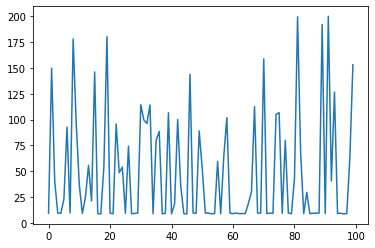

In [ ]:
env = gym.make('CartPole-v0')
episode_lengths, params = random_search(env, 500)
plt.plot(episode_lengths)

In [ ]:
play_multiple_episodes(env, 100, params)

avg_length:  200.0


200.0

In [ ]:
# if we want to 'watch' the agent

# import gym
# from gym import wrappers
# env = gym.make('CartPole-v0')
# env = wrappers.Monitor(env, 'agent_in_action')

#proceed with learning

In [ ]:
import os
import sys
import pandas as pd
from datetime import datetime

In [ ]:
def build_state(features):
  return int("".join(map(lambda feature: str(int(feature)), features)))

In [ ]:
def to_bin(value, bins):
  return np.digitize(x=[value], bins=bins)[0]

In [ ]:
class FeatureTransformer:
  def __init__(self):
    self.cart_position_bins = np.linspace(-2.4,2.4,9)
    self.cart_velocity_bins = np.linspace(-2,2,9)
    self.pole_angle_bins = np.linspace(-0.4,0.4,9)
    self.pole_velocity_bins = np.linspace(-3.5,3.5,9)

  def transform(self, observation):
    #returns an int
    cart_pos, cart_vel, pole_angle, pole_vel = observation
    return build_state([
                        to_bin(cart_pos, self.cart_position_bins),
                        to_bin(cart_vel, self.cart_velocity_bins),
                        to_bin(pole_angle, self.pole_angle_bins),
                        to_bin(pole_vel, self.pole_velocity_bins)
    ])

In [ ]:
class Model:
  def __init__(self, env, feature_transformer):
    self.env = env
    self.feature_transformer = feature_transformer

    num_states = 10**env.observation_space.shape[0]
    num_actions = env.action_space.n
    self.Q = np.random.uniform(low=1, high=1, size=(num_states, num_actions))

  def predict(self, s):
    x = self.feature_transformer.transform(s)
    return self.Q[x]

  def update(self, s, a, G):
    x = self.feature_transformer.transform(s)
    self.Q[x,a] += 10e-3*(G - self.Q[x,a])
  
  def sample_action(self, s, eps):
    if np.random.random() < eps:
      return self.env.action_space.sample()
    else:
      p = self.predict(s)
      return np.argmax(p)

In [ ]:
def play_one(model, eps, gamma):
  observation = env.reset()
  done = False
  totalreward = 0
  iters = 0
  while not done and iters < 10000:
    action = model.sample_action(observation, eps)
    prev_observation = observation
    observation, reward, done, info = env.step(action)

    totalreward += reward

    if done and iters<199:
      reward -= 300
    
    #update model
    G = reward + gamma*np.max(model.predict(observation))
    model.update(prev_observation, action, G)

    iters += 1

  return totalreward

In [ ]:
def plot_running_avg(totalrewards):
  N = len(totalrewards)
  running_avg = np.empty(N)
  for t in range(N):
    running_avg[t] = totalrewards[max(0, t-100):(t+1)].mean()
  plt.plot(running_avg)

episode:  0  total reward:  30.0  eps:  1.0
episode:  100  total reward:  51.0  eps:  0.09950371902099892
episode:  200  total reward:  72.0  eps:  0.07053456158585983
episode:  300  total reward:  53.0  eps:  0.0576390417704235
episode:  400  total reward:  49.0  eps:  0.04993761694389223
episode:  500  total reward:  109.0  eps:  0.04467670516087703
episode:  600  total reward:  120.0  eps:  0.04079085082240021
episode:  700  total reward:  132.0  eps:  0.0377694787300249
episode:  800  total reward:  119.0  eps:  0.03533326266687867
episode:  900  total reward:  41.0  eps:  0.03331483023263848
episode:  1000  total reward:  119.0  eps:  0.0316069770620507
episode:  1100  total reward:  107.0  eps:  0.03013743873394561
episode:  1200  total reward:  106.0  eps:  0.028855492841238062
episode:  1300  total reward:  119.0  eps:  0.027724348650071385
episode:  1400  total reward:  45.0  eps:  0.02671658425726324
episode:  1500  total reward:  200.0  eps:  0.025811286645983367
episode:  1

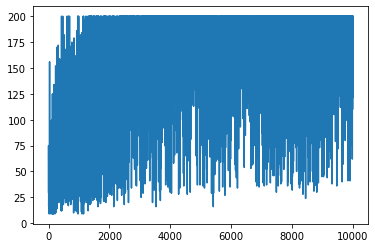

In [ ]:
env = gym.make('CartPole-v0')
ft = FeatureTransformer()
model = Model(env, ft)
gamma = 0.9
N = 10000
totalrewards = np.empty(N)
for n in range(N):
  eps = 1.0/np.sqrt(n+1)
  totalreward = play_one(model, eps, gamma)
  totalrewards[n] = totalreward
  if n % 100 == 0:
    print("episode: ", n, " total reward: ", totalreward, " eps: ", eps)
print("avg reward for last 100 episodes: ", totalrewards[-100:].mean())
print("total steps: ", totalrewards.sum())

plt.plot(totalrewards)

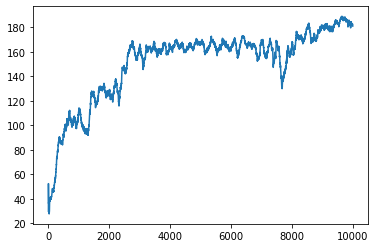

In [ ]:
plot_running_avg(totalrewards)